<a href="https://colab.research.google.com/github/Nischal2015/machine_learning/blob/linear_regression/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performing linear regression using various methods

<img align='left' style='padding-right:15px' src='https://miro.medium.com/max/640/1*LEmBCYAttxS6uI6rEyPLMQ.png' height='110px' width='150px'>

*The section below contains various way of applying linear regression. The cells below contains linear regression code applied on a small data set generated using some function.*

In [10]:
# Imports the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [53]:
# Creates the dataset
x = np.linspace(1,5,500)
y = np.cos(x) + 1.2*x + 0.25
#y = np.sqrt(121-x**2)
#y = 3*x + 15

# Sets the constant value for noise
#np.random.seed(10)

noise = np.random.normal(0, 0.5, x.shape)
y = y + noise
x = x - 5

In [54]:
df = pd.DataFrame({"Predictor":x, "Output":y})
df.describe()

,Predictor,Output
count,500.000000,500.000000
mean,-2.000000,3.423821
std,1.158171,1.453713
min,-4.000000,0.736549
25%,-3.000000,2.279431
50%,-2.000000,3.012368
75%,-1.000000,4.430887
max,0.000000,7.334482


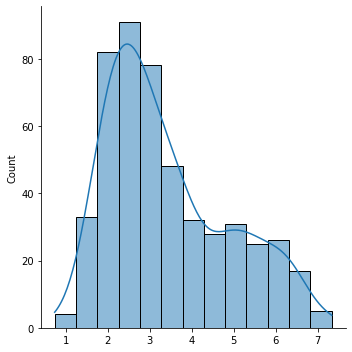

In [55]:
sns.displot(y, kde=True,)

In [56]:
## Not sure if the feature scaling or necessary of if I did it correctly.
# Feature scaling
df['scaled_Predictor'] = df['Predictor'] / (df['Predictor'].max()-df['Predictor'].min())
df['scaled_Output'] = df['Output'] / (df['Output'].max()-df['Output'].min())
df

,Predictor,Output,scaled_Predictor,scaled_Output
0,-4.000000,1.653662,-1.000000,0.250633
1,-3.991984,1.620380,-0.997996,0.245589
2,-3.983968,1.807703,-0.995992,0.273980
3,-3.975952,2.810769,-0.993988,0.426007
4,-3.967936,1.552902,-0.991984,0.235362
...,...,...,...,...
495,-0.032064,6.359736,-0.008016,0.963898
496,-0.024048,6.638872,-0.006012,1.006205
497,-0.016032,6.433141,-0.004008,0.975024
498,-0.008016,7.263420,-0.002004,1.100863


In [57]:
from sklearn.model_selection import train_test_split

# Splits the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(df.scaled_Predictor, df.scaled_Output)

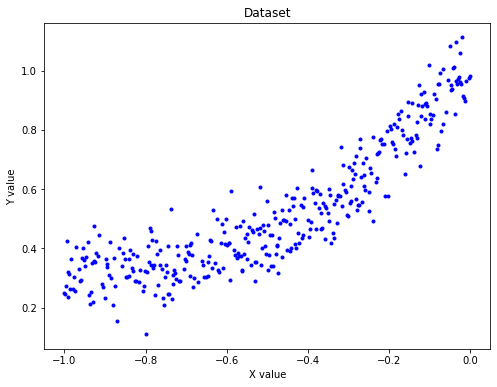

In [58]:
plt.figure(figsize=(8,6))
plt.title("Dataset")
plt.xlabel('X value')
plt.ylabel('Y value')
plt.scatter(x_train, y_train, marker='.', color='blue')

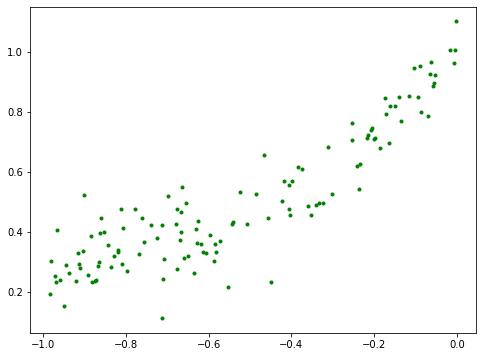

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, marker='.', color='g')

## Linear Regression Using Least Square Method

<!--NAVIGATION-->
*To understand the least square method please do visit here: [The Least Squares Method](https://docs.google.com/document/d/1vXgizn0Zz5VM_mTEfrRqwydfCyn0OY5DNlkieFLRU68/edit)*

In [60]:
# Regression model
def regression(x,y):
  n = len(x)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_s_squared = np.sum(np.square(x))
  sum_xy = np.sum(x*y)

  # Slope
  m = (n*sum_xy - sum_x*sum_y)/(n*sum_s_squared - sum_x**2)
  # y-intercept
  c = (sum_y - m*sum_x)/n

  return m, c

# Function to calculate squared error
def mean_squared_error(actual, observed):
  return np.sum((actual-observed)**2)/len(actual)

# Function to calculate r-squared
def r_squared(actual, observed):
  var_mean = np.var(actual)
  var_fit = mean_squared_error(actual, observed)/len(actual)
  return (var_mean-var_fit) / var_mean

# Cost function for gradient descent
def cost_function(actual, observed):
  return 1/2*mean_squared_error(actual, observed)

In [61]:
# Calling the module
slope, intercept = regression(x_train,y_train)
print("slope:",slope,"    intercept:",intercept)

# Array of predictions
y_guess_train = slope*x_train + intercept
y_guess_test = slope*x_test + intercept

# Calculates the squared error
print("\nTraining MSE:", mean_squared_error(y_train, y_guess_train))
print("Testing MSE:", mean_squared_error(y_test, y_guess_test))

# Calculates R-squared
print("\nTraining R-squared:", r_squared(y_train, y_guess_train))
print("Testing R-squared:", r_squared(y_test, y_guess_test))

## Prints the correlation coefficient
#print(np.corrcoef(y, y_guess))

# Calculates the cost function (mean squared deviation)
#print("Cost function:", cost_function(y, y_guess))

slope: 0.674718974864616     intercept: 0.8546058713174178

Training MSE: 0.010321460138860573
Testing MSE: 0.010599461660055926

Training R-squared: 0.9994193291609672
Testing R-squared: 0.9983413461194383


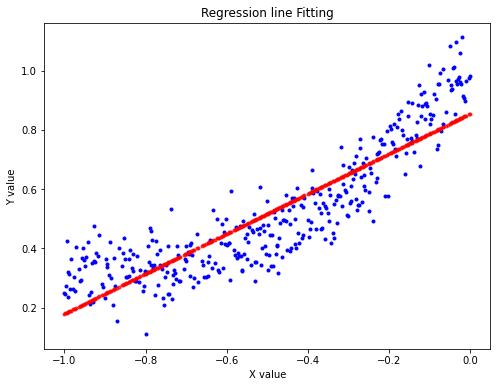

In [62]:
plt.figure(figsize=(8, 6))
plt.title("Regression line Fitting")
plt.xlabel('X value')
plt.ylabel('Y value')
plt.scatter(x_train, y_train, marker='.', color='blue')
#plt.scatter(x_test, y_test, marker='.', color='r')
plt.scatter(x_train, y_guess_train, marker='.', color='r', alpha=0.7)

## Linear Regression using Matrix Multiplication 

In [63]:
# Linear Regression using matrix multiplication
X = np.column_stack((np.ones(x_train.shape), x_train))
w = np.empty(X.ndim)

*Calculates the parameter $\theta$ = $\begin{bmatrix}m\\ c \end{bmatrix}$ using normal equation*
$$\theta = (X^TX)^{-1}X^TY = X^+Y$$
<br>
*where,*<br>
$$X^+ = (X^TX)^{-1}X^T$$
<br>*is called the pseudo-inverse of $X$*

In [64]:
y_train = np.array(y_train)
theta = np.linalg.pinv(X)@y_train[:, np.newaxis]
theta

array([[0.85460587],
       [0.67471897]])

In [65]:
Y_train_pred = X @ theta
#Y_test_pred = 
train_error = mean_squared_error(y_train, Y_train_pred.flatten())
print(train_error)

0.010321460138860573


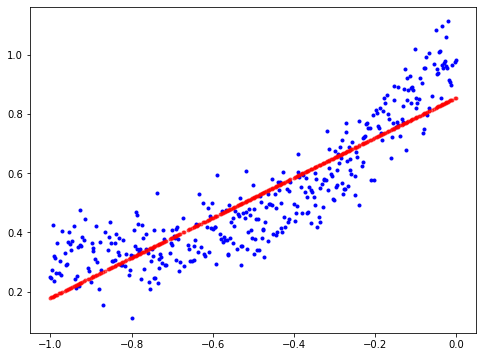

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train, marker='.', color='b',)
plt.scatter(x_train, Y_train_pred, marker='.', color='r', alpha=0.6)

## Linear Regression Using Gradient Descent

In [70]:
## Needs to improve the function as it uses exactly 1 million iterations.
# Cost Function
m, c = 0., 0.

# Learning rate
alpha = 0.001
cost = []
n = float(len(x))
for i in range(1_000_000):
  hyp = m*x+c
  d_c = 1/n*np.sum((hyp - y))
  d_m = 1/n*np.sum((hyp-y)*x)
  m = m-alpha*d_m
  c = c-alpha*d_c
  cost.append(cost_function(y, hyp))

cost = np.array(cost)

print("cost function: ", cost_function(y, hyp))
print("m:",m,"    c:",c)
y_hat = m*x+c

cost function:  0.2261120551196978
m: 1.1125028383890057     c: 5.6488268919115505


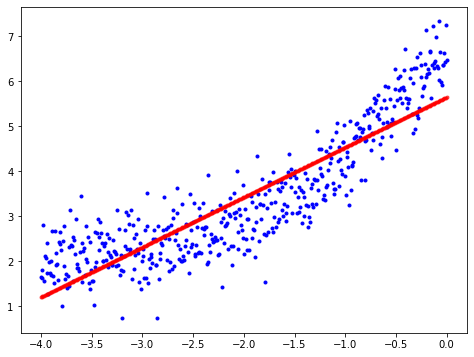

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, marker='.', color='b',)
plt.scatter(x, y_hat, marker='.', color='r', alpha=0.6)  

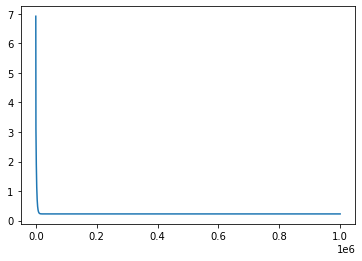

In [72]:
# Plots the cost function vs number of iterations
plt.plot(np.array(range(1,1000001)), cost)

## <p style='color:red'>The contour plot (which of course doesn't look like so) needs to be fixed.</p>

In [ ]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
theta0 = np.linspace(-1,1,200)
theta1 = np.linspace(0,2,200)
X, Y = np.meshgrid(theta0, theta1)
cost_z = cost[0::500]
COST_Z = np.tile(cost_z, (len(cost_z), 1))

ax.plot_surface(X, Y, COST_Z, rstride=1, cstride=1,
                cmap='hot', edgecolor='none')
ax.set_title('surface');

In [ ]:
sns.displot(x=theta0, y=theta1, kind='kde')